In [52]:
from utils.data import get_data
import pandas_profiling
from api.creds import client_connect
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
client = client_connect('TDA', 'private/creds.ini')
data = get_data(client, symbol='NVDA', period='ONE_YEAR', period_type='YEAR', frequency='DAILY', frequency_type='DAILY',
                    features= { 
                                'EMA': {'timeperiod': 5}, 'BBANDS': {}
                               
                    }, api='TDA', save=True)
data

,open,close,high,low,volume,EMA,UPPER_BBAND,MIDDLE_BBAND,LOWER_BBAND
datetime,,,,,,,,,
2021-09-22 05:00:00,213.6550,219.41,219.6000,211.96,26872556.0,216.884000,225.564356,216.884,208.203644
2021-09-23 05:00:00,221.4000,224.82,225.3450,218.90,24855491.0,219.529333,227.378650,217.364,207.349350
2021-09-24 05:00:00,220.7000,220.81,221.4900,218.61,21765545.0,219.956222,228.076255,217.726,207.375745
2021-09-27 05:00:00,217.1035,216.60,217.9900,213.25,24521514.0,218.837481,227.099430,218.820,210.540570
2021-09-28 05:00:00,212.1350,206.99,214.1900,206.51,34306895.0,214.888321,229.699348,217.726,205.752652
...,...,...,...,...,...,...,...,...,...
2022-09-12 05:00:00,143.6900,145.05,145.4700,141.98,48415924.0,142.833752,147.981622,140.122,132.262378
2022-09-13 05:00:00,138.0200,131.31,139.2200,130.99,71495563.0,138.992501,149.361352,139.454,129.546648
2022-09-14 05:00:00,132.5400,131.28,132.8999,129.13,58850654.0,136.421668,150.191199,138.282,126.372801


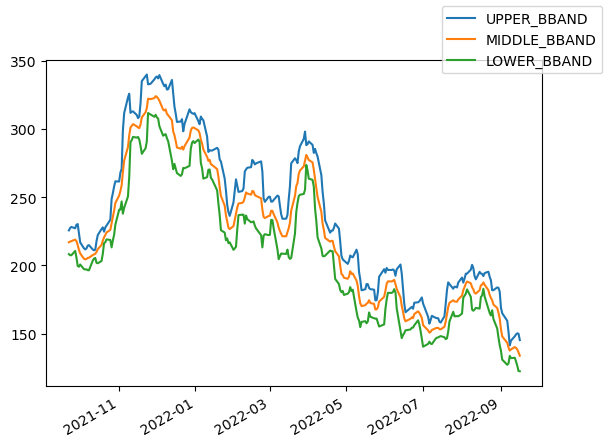

In [60]:
bband_cols = [ 'UPPER_BBAND', 'MIDDLE_BBAND', 'LOWER_BBAND' ]
fig = plt.figure()
nvda_plot = fig.add_subplot()
for col in bband_cols:
    nvda_plot.plot(data.index.values, data[col], label=col)
fig.legend()
fig.autofmt_xdate()